In [3]:
from epydemix import EpiModel
from epydemix.utils import compute_days, compute_simulation_dates
from epydemix.model import load_predefined_model
from epydemix.visualization import plot_quantiles
from models.stochastic_sir import StochasticSIR
from models.stochastic_seir import StochasticSEIR
from models.stochastic_sis import StochasticSIS
import matplotlib.pyplot as plt 

start_date = '2020-01-01'
end_date = '2020-06-30'
n_days = compute_days(start_date, end_date)
dates = compute_simulation_dates(start_date, end_date)

# SIR model

In [5]:
initial_conditions = {'Susceptible': 99990, 'Infected': 10, 'Recovered': 0}

# predefined SIR model
epydemix_predefined_SIR = load_predefined_model(model_name='SIR', transmission_rate=0.2, recovery_rate=0.1)
results_epydemix_predefined_SIR  = epydemix_predefined_SIR.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

# custom SIR model
epydemix_custom_SIR = EpiModel(compartments=['Susceptible', 'Infected', 'Recovered'], 
                               parameters={'transmission_rate': 0.2, 'recovery_rate': 0.1}) 
epydemix_custom_SIR.add_transition(source='Susceptible', target='Infected', kind="mediated", params=('transmission_rate', "Infected"))
epydemix_custom_SIR.add_transition(source='Infected', target='Recovered', kind="spontaneous", params='recovery_rate')
results_epydemix_custom_SIR  = epydemix_custom_SIR.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

In [6]:
stochastic_sir = StochasticSIR(S0=99990,
                                I0=10,
                                R0=0,
                                beta=0.2,
                                gamma=0.1,
                                population=100000,
                                time_steps=n_days)

stochastic_sir_results = stochastic_sir.run_simulations(Nsim=1000, quantiles=[0.05, 0.5, 0.95])

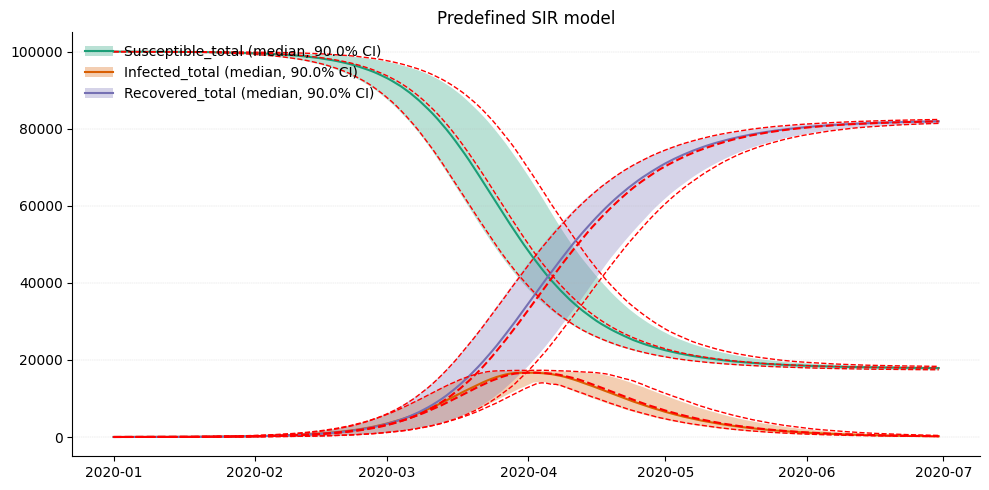

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_predefined_SIR.get_quantiles_compartments(), columns=["Susceptible_total", 
                                                         "Infected_total", 
                                                         "Recovered_total"], 
               title="Predefined SIR model", ax=ax)  
ax.plot(dates, stochastic_sir_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["I"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sir_results["R"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sir_results["R"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["R"][0.95], linestyle='--', color='red', linewidth=1)

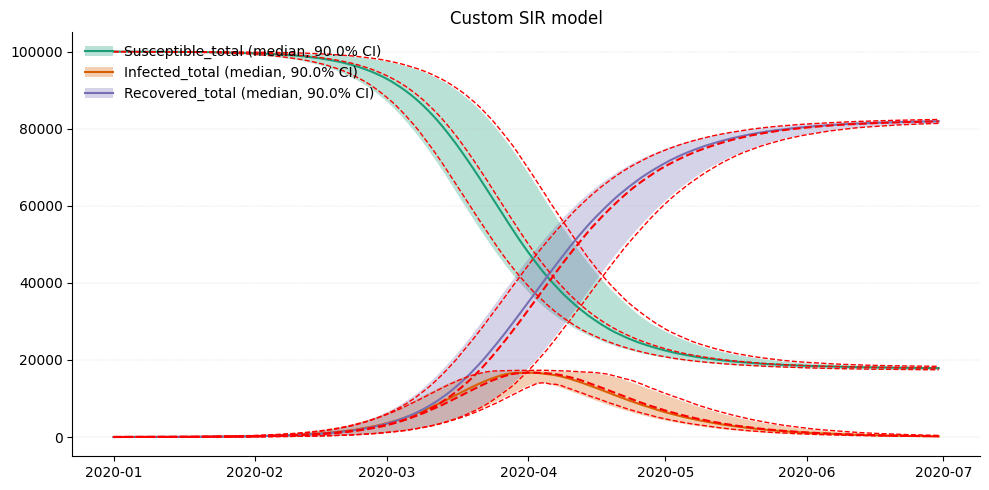

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_custom_SIR.get_quantiles_compartments(), columns=["Susceptible_total", 
                                                         "Infected_total", 
                                                         "Recovered_total"], 
               title="Custom SIR model", ax=ax)  

ax.plot(dates, stochastic_sir_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["I"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sir_results["R"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sir_results["R"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sir_results["R"][0.95], linestyle='--', color='red', linewidth=1)


# SEIR Model

In [8]:
initial_conditions = {'Susceptible': 99990, 'Infected': 5, 'Exposed': 5, 'Recovered': 0}

# predefined SEIR model
epydemix_predefined_SEIR = EpiModel(predefined_model='SEIR', transmission_rate=0.3, recovery_rate=0.1, incubation_rate=0.2)
results_epydemix_predefined_SEIR  = epydemix_predefined_SEIR.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

# custom SEIR model
epydemix_custom_SEIR = EpiModel(compartments=['Susceptible', 'Infected', 'Exposed', 'Recovered'], 
                               parameters={'transmission_rate': 0.3, 'recovery_rate': 0.1, 'incubation_rate': 0.2}) 
epydemix_custom_SEIR.add_transition('Susceptible', 'Exposed', 'transmission_rate', 'Infected')
epydemix_custom_SEIR.add_transition('Exposed', 'Infected', 'incubation_rate')
epydemix_custom_SEIR.add_transition('Infected', 'Recovered', 'recovery_rate')
results_epydemix_custom_SEIR  = epydemix_custom_SEIR.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

In [9]:
stochastic_seir = StochasticSEIR(S0=99990,
                                 E0=5,
                                I0=5,
                                R0=0,
                                beta=0.3,
                                gamma=0.1,
                                sigma=0.2,
                                population=100000,
                                time_steps=n_days)

stochastic_seir_results = stochastic_seir.run_simulations(Nsim=1000, quantiles=[0.05, 0.5, 0.95])

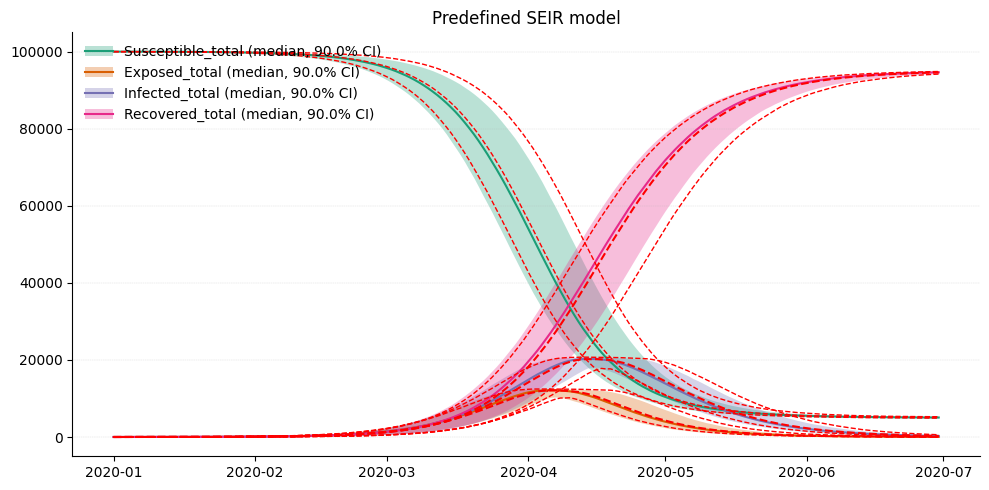

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_predefined_SEIR.get_quantiles_compartments(), columns=["Susceptible_total", 
                                                          "Exposed_total",
                                                         "Infected_total", 
                                                         "Recovered_total"], 
               title="Predefined SEIR model", ax=ax)  
ax.plot(dates, stochastic_seir_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["E"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["E"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["I"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["R"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["R"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["R"][0.95], linestyle='--', color='red', linewidth=1)

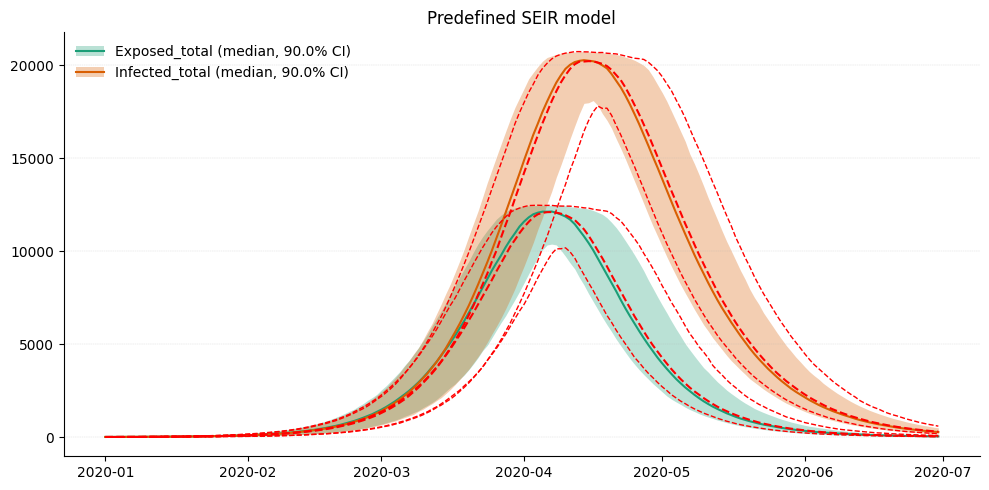

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_predefined_SEIR.get_quantiles_compartments(), columns=[ 
                                                          "Exposed_total",
                                                         "Infected_total"], 
               title="Predefined SEIR model", ax=ax)  
ax.plot(dates, stochastic_seir_results["E"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["E"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["I"][0.95], linestyle='--', color='red', linewidth=1)



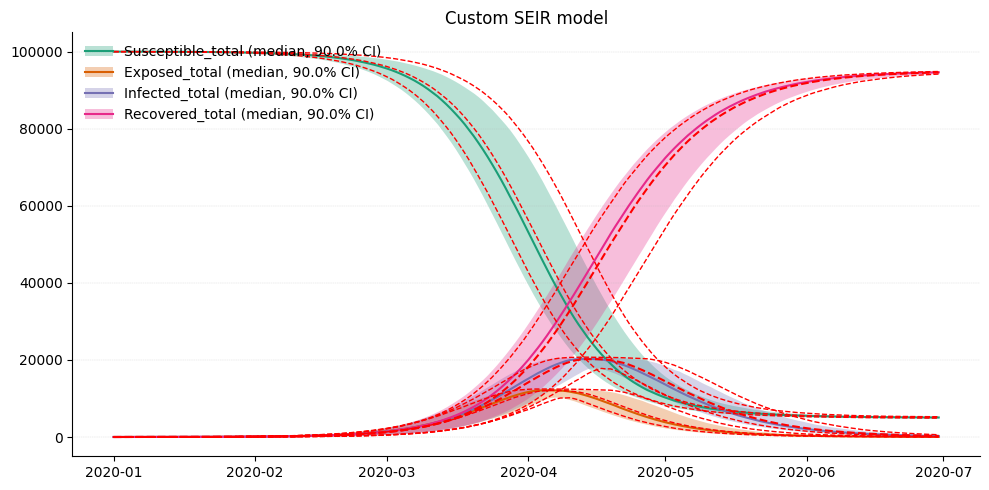

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_custom_SEIR.get_quantiles_compartments(), columns=["Susceptible_total", 
                                                     "Exposed_total",
                                                         "Infected_total", 
                                                         "Recovered_total"], 
               title="Custom SEIR model", ax=ax)  

ax.plot(dates, stochastic_seir_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["E"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["I"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["R"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["R"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["R"][0.95], linestyle='--', color='red', linewidth=1)


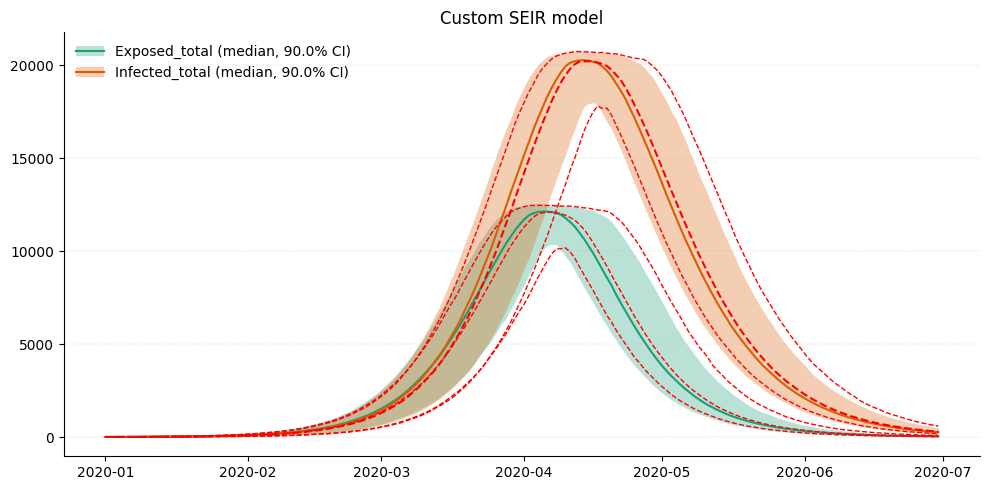

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_custom_SEIR.get_quantiles_compartments(), columns=[ 
                                                     "Exposed_total",
                                                         "Infected_total"], 
               title="Custom SEIR model", ax=ax)  


ax.plot(dates, stochastic_seir_results["E"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["E"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_seir_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_seir_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_seir_results["I"][0.95], linestyle='--', color='red', linewidth=1)



# SIS Model

In [14]:
initial_conditions = {'Susceptible': 99990, 'Infected': 10}

# predefined SIS model
epydemix_predefined_SIS = EpiModel(predefined_model='SIS', transmission_rate=0.2, recovery_rate=0.1)
results_epydemix_predefined_SIS  = epydemix_predefined_SIS.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

# custom SIS model
epydemix_custom_SIS = EpiModel(compartments=['Susceptible', 'Infected'], 
                               parameters={'transmission_rate': 0.2, 'recovery_rate': 0.1}) 
epydemix_custom_SIS.add_transition('Susceptible', 'Infected', 'transmission_rate', 'Infected')
epydemix_custom_SIS.add_transition('Infected', 'Susceptible', 'recovery_rate')
results_epydemix_custom_SIS  = epydemix_custom_SIS.run_simulations(start_date=start_date, 
                                                  end_date=end_date, 
                                                  Nsim=1000, 
                                                  initial_conditions_dict=initial_conditions)

In [15]:
stochastic_sis = StochasticSIS(S0=99990,
                                I0=10,
                                beta=0.2,
                                gamma=0.1,
                                population=100000,
                                time_steps=n_days)

stochastic_sis_results = stochastic_sis.run_simulations(Nsim=100, quantiles=[0.05, 0.5, 0.95])

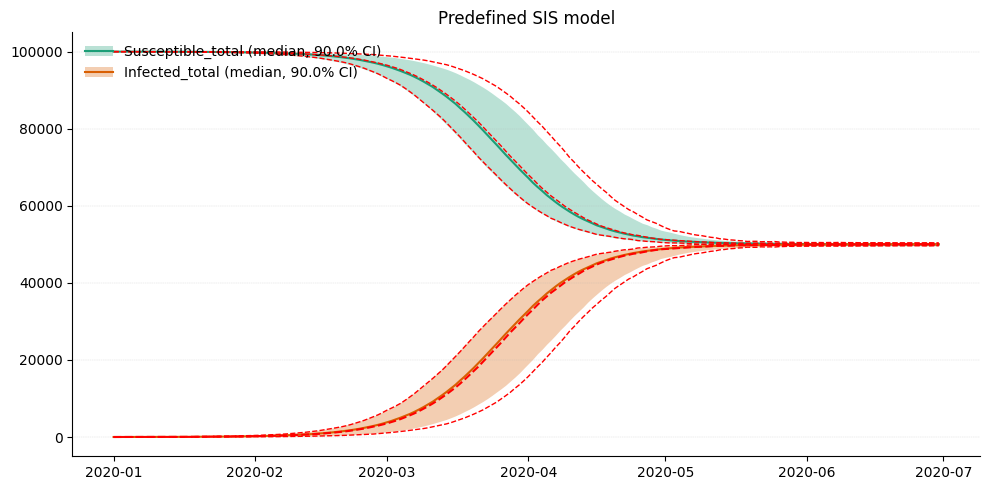

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_predefined_SIS.get_quantiles_compartments(), columns=[ 
                                                     "Susceptible_total",
                                                         "Infected_total"], 
               title="Predefined SIS model", ax=ax)  


ax.plot(dates, stochastic_sis_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sis_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sis_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["I"][0.95], linestyle='--', color='red', linewidth=1)



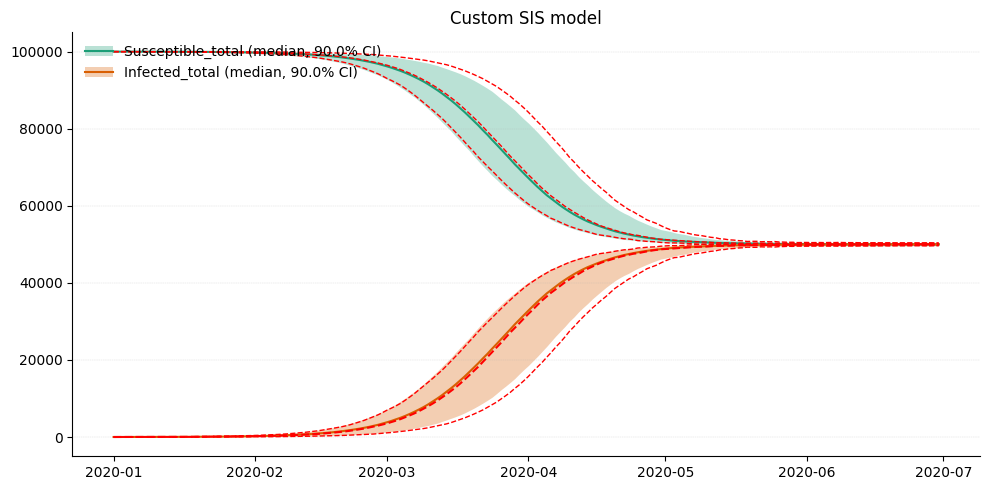

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_quantiles(results_epydemix_custom_SIS.get_quantiles_compartments(), columns=[ 
                                                     "Susceptible_total",
                                                         "Infected_total"], 
               title="Custom SIS model", ax=ax)  


ax.plot(dates, stochastic_sis_results["S"][0.5], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["S"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["S"][0.95], linestyle='--', color='red', linewidth=1)

ax.plot(dates, stochastic_sis_results["I"][0.5], linestyle='--', color='red')
ax.plot(dates, stochastic_sis_results["I"][0.05], linestyle='--', color='red', linewidth=1)
ax.plot(dates, stochastic_sis_results["I"][0.95], linestyle='--', color='red', linewidth=1)

